## Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Exploration 

In [13]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [15]:
# Check For misssing values
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [16]:
df[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

## 3. Data Preprocessing and Cleaning

In [17]:
# Handle Categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
categorical_features = df.select_dtypes(include=['object'])
for col in categorical_features :
    df[col] = le.fit_transform(df[col])

In [19]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [21]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [23]:
df_copy = df.drop(columns=[' loan_status'], axis=1)

In [24]:
num_cols = df_copy.select_dtypes(include='int64')

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in num_cols : 
    df[col] = scaler.fit_transform(df[[col]])

In [26]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-1.731645,-0.294102,-0.995559,-1.007288,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,0
1,-1.730834,-1.473548,1.004461,0.992765,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,1
2,-1.730022,0.295621,-0.995559,-1.007288,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1
3,-1.729211,0.295621,-0.995559,-1.007288,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1
4,-1.728399,1.475067,1.004461,0.992765,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,1


In [28]:
X = df.drop(columns=' loan_status', axis=1)
y = df[' loan_status']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
# Step 4.1: Check class distribution
print("Class distribution before balancing:")
print(y_train.value_counts())

Class distribution before balancing:
 loan_status
0    2125
1    1290
Name: count, dtype: int64


## 4. Apply SMOTE (oversampling)

In [32]:
# Step 4.2: Apply SMOTE to balance the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())


Class distribution after SMOTE:
 loan_status
1    2125
0    2125
Name: count, dtype: int64


## 5. Model Selection

In [33]:
from sklearn.metrics import confusion_matrix, classification_report 

In [34]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
Lr.fit(X_train_resampled,y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [36]:
log_y_pred = Lr.predict(x_test)

# Evaluation 
print("Logistic Regression Results")
print("classification_report :\n ", classification_report(y_test, log_y_pred))

Logistic Regression Results
classification_report :
                precision    recall  f1-score   support

           0       0.95      0.94      0.95       531
           1       0.91      0.91      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



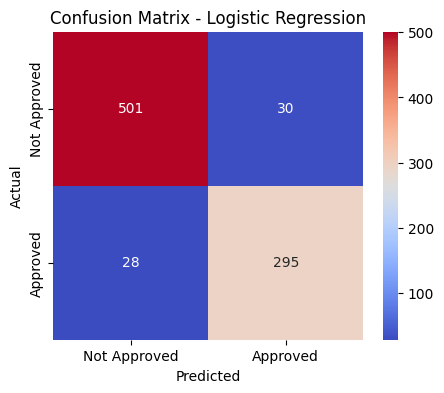

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, log_y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['Not Approved', 'Approved'], 
            yticklabels=['Not Approved', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dc_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dc_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [43]:
y_pred_dt = dc_clf.predict(x_test)

print("classification_report : \n ", classification_report(y_test, y_pred_dt))

classification_report : 
                precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.97      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



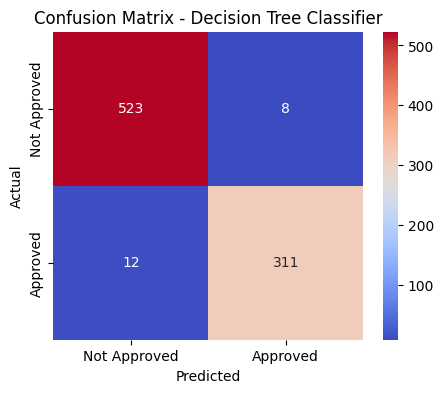

In [44]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['Not Approved', 'Approved'], 
            yticklabels=['Not Approved', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

In [47]:
from sklearn.metrics import accuracy_score
print(f"Logistic Regression Accuracy :  {accuracy_score(y_test, log_y_pred)*100 :.2f}%")
print(f"Decision Tree Accuracy : {accuracy_score(y_test, y_pred_dt) * 100:.2f}%")

Logistic Regression Accuracy :  93.21%
Decision Tree Accuracy : 97.66%
